# Midterm Exam Big Data
- Name : Muhammad Nevin
- NRP : 05111940000079

# CRISP-DM Methodology:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

## 1. Business Understanding

You can add description in here by using your own words.
- Find the frequent itemset based on the watchlist data.
- Build the recommendation movie systems.

## 2. Data Understanding

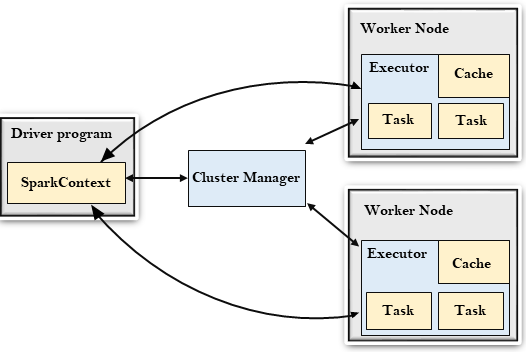

In [1]:
# Install Apache Spark
!pip install pyspark

In [2]:
# Import required libraries

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.fpm import FPGrowth


In [3]:
# Create Spark Session/Context
spark = SparkSession.builder \
    .master("local") \
    .appName("Frequent Itemset") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [4]:
# Import the data from CSV
movies = spark.read.option("header", True).csv("movies.csv")
movies.show()

+-------+--------------------+
|movieId|               title|
+-------+--------------------+
|      1|    Toy Story (1995)|
|      2|      Jumanji (1995)|
|      3|Grumpier Old Men ...|
|      4|Waiting to Exhale...|
|      5|Father of the Bri...|
|      6|         Heat (1995)|
|      7|      Sabrina (1995)|
|      8| Tom and Huck (1995)|
|      9| Sudden Death (1995)|
|     10|    GoldenEye (1995)|
|     11|American Presiden...|
|     12|Dracula: Dead and...|
|     13|        Balto (1995)|
|     14|        Nixon (1995)|
|     15|Cutthroat Island ...|
|     16|       Casino (1995)|
|     17|Sense and Sensibi...|
|     18|   Four Rooms (1995)|
|     19|Ace Ventura: When...|
|     20|  Money Train (1995)|
+-------+--------------------+
only showing top 20 rows



In [5]:
# Import the data from CSV
watchlist = spark.read.option("header", True).csv("watchlist.csv")
watchlist.show()

+------+-------+
|userId|movieId|
+------+-------+
|     1|      1|
|     1|      3|
|     1|      6|
|     1|     47|
|     1|     50|
|     1|     70|
|     1|    101|
|     1|    110|
|     1|    151|
|     1|    157|
|     1|    163|
|     1|    216|
|     1|    223|
|     1|    231|
|     1|    235|
|     1|    260|
|     1|    296|
|     1|    316|
|     1|    333|
|     1|    349|
+------+-------+
only showing top 20 rows



## 3. Data Preparation

We need to prepare the data into combination of ["id", "items"] = [1, [a, b, c]]

In [6]:
# Select only the first two column
watchlist_raw = watchlist.select("userId", "movieId")
watchlist_raw.show()

+------+-------+
|userId|movieId|
+------+-------+
|     1|      1|
|     1|      3|
|     1|      6|
|     1|     47|
|     1|     50|
|     1|     70|
|     1|    101|
|     1|    110|
|     1|    151|
|     1|    157|
|     1|    163|
|     1|    216|
|     1|    223|
|     1|    231|
|     1|    235|
|     1|    260|
|     1|    296|
|     1|    316|
|     1|    333|
|     1|    349|
+------+-------+
only showing top 20 rows



In [7]:
# Before dropping the duplicates
watchlist_raw.count()

81763

In [8]:
# Remove the duplicates
watchlist_raw = watchlist_raw.dropDuplicates(["userId", "movieId"])
watchlist_raw.count()

81763

There is no duplicate data

In [9]:
# Convert into this format: ["id", "items"] = [1, [a, b, c]]
# You can use groupBy, agg, and collect_list methods

watchlist_input = watchlist_raw.groupBy("userId").agg(collect_list('movieId').alias('movies'))
watchlist_input.show()

+------+--------------------+
|userId|              movies|
+------+--------------------+
|     1|[919, 2366, 3033,...|
|    10|[95167, 7458, 517...|
|   100|[3098, 2423, 2100...|
|   101|[2722, 2600, 2541...|
|   102|[377, 588, 349, 2...|
|   103|[410, 3988, 555, ...|
|   104|[1253, 6711, 1408...|
|   105|[5026, 5373, 8641...|
|   106|[106489, 40815, 8...|
|   107|[292, 11, 410, 31...|
|   108|[3751, 4144, 5349...|
|   109|[39, 266, 778, 10...|
|    11|[1552, 733, 1840,...|
|   110|[1198, 6016, 1089...|
|   111|[87485, 170401, 2...|
|   112|[288, 70286, 454,...|
|   113|[2752, 1829, 838,...|
|   114|[54001, 79702, 86...|
|   115|[480, 3037, 1566,...|
|   116|[339, 350, 1380, ...|
+------+--------------------+
only showing top 20 rows



## 4. Modeling

In [10]:
def fpGrowthModel(ms, mc):
  # 1. Create the instance
  fpGrowth = FPGrowth(itemsCol="movies", minSupport=ms, minConfidence=mc)

  # 2. Train/fit the data training to become a model
  model = fpGrowth.fit(watchlist_input)
  
  return model

In [11]:
# fpGrowth with minSupport=0.1, minConfidence=0.1
m1 = fpGrowthModel(0.1, 0.1)

# fpGrowth with minSupport=0.5, minConfidence=0.5
m2 = fpGrowthModel(0.5, 0.5)

# fpGrowth with minSupport=0.25, minConfidence=0.25
m3 = fpGrowthModel(0.25, 0.25)

## 5. Evaluation

We take a look into several metrics like min_support, confidence, lift, antencedence and consequent

In [12]:
def showResult(model) :
  # Frequent Itemset
  model.freqItemsets.show()
  # Display generated association rules.
  model.associationRules.show()

In [13]:
# Display Frequent Itemset and generated association rules.
showResult(m1)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+------------------+----+
|             items|freq|
+------------------+----+
|             [231]|  88|
|        [231, 296]|  68|
|        [231, 318]|  63|
|        [231, 356]|  72|
|            [1610]|  85|
|       [1610, 589]|  65|
|      [1610, 1196]|  70|
| [1610, 1196, 260]|  62|
|       [1610, 260]|  65|
|      [1610, 2571]|  72|
|      [1610, 1210]|  66|
|[1610, 1210, 1196]|  62|
|       [1610, 356]|  63|
|            [3751]|  67|
|            [2542]|  65|
|            [1258]| 102|
|      [1258, 2762]|  62|
|      [1258, 1196]|  70|
| [1258, 1196, 260]|  63|
| [1258, 1196, 593]|  61|
+------------------+----+
only showing top 20 rows

+--------------------+----------+-------------------+------------------+-------------------+
|          antecedent|consequent|         confidence|              lift|            support|
+--------------------+----------+-------------------+------------------+-------------------+
|[50, 2959, 593, 318]|    [2571]| 0.8354430379746836| 1.979707432399153

In [14]:
# Display Frequent Itemset and generated association rules.
showResult(m2)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+-----+----+
|items|freq|
+-----+----+
|[318]| 313|
|[356]| 315|
+-----+----+

+----------+----------+----------+----+-------+
|antecedent|consequent|confidence|lift|support|
+----------+----------+----------+----+-------+
+----------+----------+----------+----+-------+



In [15]:
# Display Frequent Itemset and generated association rules.
showResult(m3)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+---------------+----+
|          items|freq|
+---------------+----+
|         [7153]| 174|
|   [7153, 4993]| 155|
|         [2762]| 158|
|         [3578]| 153|
|          [589]| 210|
|     [589, 356]| 154|
|          [150]| 185|
|           [32]| 171|
|         [1196]| 199|
|    [1196, 260]| 176|
|   [1196, 2571]| 157|
|          [780]| 164|
|          [457]| 182|
|          [296]| 287|
|     [296, 318]| 209|
|[296, 318, 356]| 161|
|     [296, 356]| 207|
|          [260]| 234|
|    [260, 2571]| 161|
|           [47]| 191|
+---------------+----+
only showing top 20 rows

+----------+----------+-------------------+------------------+-------------------+
|antecedent|consequent|         confidence|              lift|            support|
+----------+----------+-------------------+------------------+-------------------+
|    [5952]|    [4993]| 0.8908045977011494|2.9644808743169397| 0.2545155993431856|
|      [50]|     [296]| 0.7868020304568528|1.6695555280425902| 0.2545155993431856|
|      

### Best fpGrowthmodel is with hyperparameter minSupport=0.1, minConfidence=0.1

## 6. Deployment

You can test your model with new input

In [16]:
# Prepare the input test
test = spark.createDataFrame(
    [
     ("123", ["316"]),
     ("456", ["457"]),
     ("666", ["DOT", "231"])
    ],
    ["userId", "movies"]
)

test.show()

+------+----------+
|userId|    movies|
+------+----------+
|   123|     [316]|
|   456|     [457]|
|   666|[DOT, 231]|
+------+----------+



In [18]:
# Predict the input based on the model
result = m1.transform(test)
result.show()

+------+----------+--------------------+
|userId|    movies|          prediction|
+------+----------+--------------------+
|   123|     [316]|[150, 589, 780, 3...|
|   456|     [457]|[153, 587, 1214, ...|
|   666|[DOT, 231]|     [296, 318, 356]|
+------+----------+--------------------+



In [31]:
# Convert array of values into rows
result = result.select(result.userId, result.movies, explode(result.prediction).alias("prediction"))
result.show()

+------+------+----------+
|userId|movies|prediction|
+------+------+----------+
|   123| [316]|       150|
|   123| [316]|       589|
|   123| [316]|       780|
|   123| [316]|       377|
|   123| [316]|       457|
|   123| [316]|       296|
|   123| [316]|        47|
|   123| [316]|       165|
|   123| [316]|       480|
|   123| [316]|       592|
|   123| [316]|       318|
|   123| [316]|       588|
|   123| [316]|       590|
|   123| [316]|       593|
|   123| [316]|       364|
|   123| [316]|       110|
|   123| [316]|       380|
|   123| [316]|       356|
|   123| [316]|       329|
|   123| [316]|        10|
+------+------+----------+
only showing top 20 rows



In [25]:
# Save original dataframe into temporary table
movies.createOrReplaceTempView("movie")

In [26]:
# You can use Spark SQL Context to do query
# In this query, we want to select the StockCode and Description and save it into products table
spark.sql("SELECT DISTINCT movieId, title FROM movie").createOrReplaceTempView("products")

In [27]:
spark.sql("SELECT * FROM products").show()

+-------+--------------------+
|movieId|               title|
+-------+--------------------+
|     63|Don't Be a Menace...|
|    335|   Underneath (1995)|
|   1236|        Trust (1990)|
|   1324|Amityville: Dollh...|
|   2202|     Lifeboat (1944)|
|   2372| Fletch Lives (1989)|
|   2483|Day of the Beast,...|
|   2728|    Spartacus (1960)|
|   2871|  Deliverance (1972)|
|   2951|Fistful of Dollar...|
|   3598|       Hamlet (2000)|
|   3736|Ace in the Hole (...|
|   4015|Dude, Where's My ...|
|   4027|O Brother, Where ...|
|   4402|Dr. Goldfoot and ...|
|   4786|Legend of Hell Ho...|
|   4866|Last Castle, The ...|
|   4995|Beautiful Mind, A...|
|   5607|Son of the Bride ...|
|   5803|        I Spy (2002)|
+-------+--------------------+
only showing top 20 rows



In [33]:
# Create temporary table from result DataFrame
result.createOrReplaceTempView("result")

In [34]:
spark.sql("SELECT r.userId, r.movies, r.prediction, p.title  FROM result r INNER JOIN products p ON r.prediction = p.movieId ORDER BY r.userId").show()

+------+------+----------+--------------------+
|userId|movies|prediction|               title|
+------+------+----------+--------------------+
|   123| [316]|       150|    Apollo 13 (1995)|
|   123| [316]|       780|Independence Day ...|
|   123| [316]|       377|        Speed (1994)|
|   123| [316]|       589|Terminator 2: Jud...|
|   123| [316]|       296| Pulp Fiction (1994)|
|   123| [316]|        47|Seven (a.k.a. Se7...|
|   123| [316]|       165|Die Hard: With a ...|
|   123| [316]|       480|Jurassic Park (1993)|
|   123| [316]|       457|Fugitive, The (1993)|
|   123| [316]|       318|Shawshank Redempt...|
|   123| [316]|       588|      Aladdin (1992)|
|   123| [316]|       590|Dances with Wolve...|
|   123| [316]|       593|Silence of the La...|
|   123| [316]|       364|Lion King, The (1...|
|   123| [316]|       110|   Braveheart (1995)|
|   123| [316]|       380|    True Lies (1994)|
|   123| [316]|       356| Forrest Gump (1994)|
|   123| [316]|       329|Star Trek: Gen